In [1]:
#loading a libraries requied for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling
%matplotlib inline
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')



# SVR model with all features

In [2]:
#loading a data
happy=pd.read_csv("world-happiness-report.csv")
#by using a path we can upload a file
#happy=pd.read_csv("C:/Users/prita/Project Analysis/world-happiness-report.csv") 
happy.head()
#to get a data upto year 2019
happy=happy.loc[happy.year<=2019,:]
happy.describe()
#to check any null value present or not
happy.isnull().sum()

x=happy.iloc[:,1:]
y=happy.iloc[:,0]
#removing a null values with the help of simple imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median') 
imputer = imputer.fit(x)
x= imputer.transform(x)
x=pd.DataFrame(x)
happy1=x
happy1.columns =['year','Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
                 'Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']


In [3]:
#mean of the life ladder 
life_ladder_mean=happy['Life Ladder'].mean()

#standard deviation of life ladder
life_ladder_std=happy['Life Ladder'].std()

y = np.array(happy1['Life Ladder']).reshape(-1,1)
X=happy1.iloc[:,2:]

# Feature Scaling 
sc_X = StandardScaler() 
sc_y = StandardScaler() 
X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(y)

#splitting a data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, shuffle = False) 

#to obtain the value of C and epsilon for the SVR model
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}    
svr_gridsearch =  LinearSVR(fit_intercept=True, max_iter=10000)
grid_svr = GridSearchCV(svr_gridsearch, grid, scoring='neg_mean_absolute_error', cv=5)
grid_svr.fit(X_train, y_train)
best_grid_svr_mae = grid_svr.best_estimator_
best_grid_svr_mae.fit(X_train, y_train)

LinearSVR(C=0.01, epsilon=0.21387755102040817, max_iter=10000)

In [4]:
from sklearn.svm import SVR
#applying a SVR model
regressor = SVR(kernel="linear",C=0.01, epsilon=0.21387755102040817)
regressor.fit(X_train,y_train)
print('Coefficients: \n', regressor.coef_)
predictions = regressor.predict(X_test)
from sklearn.metrics import accuracy_score
#to find the root mean square error to find the model is fit or not and the value of r square
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("The R^2 score is: ", metrics.r2_score(y_test,predictions))


Coefficients: 
 [[ 0.32064616  0.24519907  0.17578217  0.07031228  0.06568859 -0.10152517
   0.19132898  0.01309587]]
MAE: 0.38623908768700344
MSE: 0.28679823768048357
RMSE: 0.5355354681815981
The R^2 score is:  0.7586926408136955


# SVR with highly correlated features 

In [5]:
#loading a data
happy=pd.read_csv("world-happiness-report.csv")
happy.head()
#to get a data upto year 2019
happy=happy.loc[happy.year<=2019,:]
happy.describe()
#to check any null value present or not
happy.isnull().sum()

x=happy.iloc[:,1:]
y=happy.iloc[:,0]
#removing a null values with the help of simple imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median') 
imputer = imputer.fit(x)
x= imputer.transform(x)
x=pd.DataFrame(x)
happy1=x
happy1.columns =['year','Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
                 'Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']
happy1= happy1.drop(columns = ['year'])
happy1= happy1.drop(columns = ['Generosity','Negative affect'])
happy1.head()

y = np.array(happy1['Life Ladder']).reshape(-1,1)
X=happy1.iloc[:,1:]
# Feature Scaling 
sc_X = StandardScaler() 
sc_y = StandardScaler() 
X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(y)
#splitting a dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, shuffle = False) 

#to obtain the value of C and epsilon
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}    
svr_gridsearch =  LinearSVR(fit_intercept=True, max_iter=10000)
grid_svr = GridSearchCV(svr_gridsearch, grid, scoring='neg_mean_absolute_error', cv=5)
grid_svr.fit(X_train, y_train)
best_grid_svr_mae = grid_svr.best_estimator_
best_grid_svr_mae.fit(X_train, y_train)

LinearSVR(C=0.01, epsilon=0.21387755102040817, max_iter=10000)

In [6]:
from sklearn.svm import SVR
#applying a SVR model
regressor = SVR(kernel="linear",C=0.01, epsilon=0.21387755102040817)
regressor.fit(X_train,y_train)
print('Coefficients: \n', regressor.coef_)

predictions = regressor.predict(X_test)
#regressor.score(y_test,predictions)

from sklearn.metrics import accuracy_score
#to find the root mean square error to find the model is fit or not.
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("The R^2 score is: ", metrics.r2_score(y_test,predictions))
#print("accuracy score:",metrics.accuracy_score(y_test,predictions))

Coefficients: 
 [[ 0.29875962  0.24140693  0.18691676  0.08214482 -0.12172374  0.20265919]]
MAE: 0.3847694393645058
MSE: 0.279068922151761
RMSE: 0.5282697437406016
The R^2 score is:  0.7651959608258346


# SVR with highly correlated features for a 2020 dataset

In [7]:
#loading a data
happy=pd.read_csv("world-happiness-report.csv")
happy.head()
#to get a data upto year 2019
happy=happy.loc[happy.year>2019,:]
happy.describe()
#to check any null value present or not
happy.isnull().sum()

x=happy.iloc[:,1:]
y=happy.iloc[:,0]
#removing a null values with the help of simple imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median') 
imputer = imputer.fit(x)
x= imputer.transform(x)

x=pd.DataFrame(x)
happy1=x
happy1.columns =['year','Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
                 'Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']
happy1= happy1.drop(columns = ['year'])
happy1= happy1.drop(columns = ['Generosity','Negative affect'])
happy1.head()

y = np.array(happy1['Life Ladder']).reshape(-1,1)
X=happy1.iloc[:,1:]
# Feature Scaling 
sc_X = StandardScaler() 
sc_y = StandardScaler() 
X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(y)
#splitting a dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, shuffle = False) 

#to obtain the value of C and epsilon
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}    
svr_gridsearch =  LinearSVR(fit_intercept=True, max_iter=10000)
grid_svr = GridSearchCV(svr_gridsearch, grid, scoring='neg_mean_absolute_error', cv=5)
grid_svr.fit(X_train, y_train)
best_grid_svr_mae = grid_svr.best_estimator_
best_grid_svr_mae.fit(X_train, y_train)

LinearSVR(C=0.6216326530612245, epsilon=0.21387755102040817, max_iter=10000)

   Log GDP per capita  Social support  Healthy life expectancy at birth  \
0            0.280361        0.310744                          0.215691   

   Freedom to make life choices  Perceptions of corruption  Positive affect  
0                      0.151156                  -0.132989         0.055851  


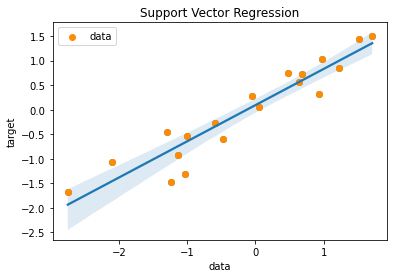

MAE: 0.35211428481461443
MSE: 0.22626807133120666
RMSE: 0.47567643554332883
The R^2 score is:  0.847615860509661


In [8]:
from sklearn.svm import SVR
#applying SVR model
regressor = SVR(kernel="linear",C=0.6216326530612245, epsilon=0.21387755102040817)
regressor.fit(X_train,y_train)
coeffecients = pd.DataFrame( (regressor.coef_),columns =['Log GDP per capita','Social support','Healthy life expectancy at birth',
                 'Freedom to make life choices','Perceptions of corruption','Positive affect',])

print(coeffecients)
#coeffecients.columns = ['Coeffecient']


predictions = regressor.predict(X_test)
#Plotting of results
sns.regplot(y_test, predictions )
lw = 2
plt.scatter(y_test, predictions ,color="darkorange", label="data")
#plt.plot (y_test, predictions, color="c", lw=lw, label="Linear Model")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score
#to find the root mean square error to find the model is fit or not.
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("The R^2 score is: ", metrics.r2_score(y_test,predictions))
#print("accuracy score:",metrics.accuracy_score(y_test,predictions))

# To see the predicted value for a particular country :

In [9]:
#loading a data
happy=pd.read_csv("world-happiness-report.csv")
happy.head()
happy.describe()
#to check any null value present or not
happy.isnull().sum()
x=happy.iloc[:,2:]
b=happy.iloc[:,1]
a=happy.iloc[:,0]
#removing a null values with the help of simple imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median') 
imputer = imputer.fit(x)
x= imputer.transform(x)
x=pd.DataFrame(x)
happy1=x
happy1.columns =['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
                 'Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']
#mean of the life ladder 
life_ladder_mean=happy['Life Ladder'].mean()
#standard deviation of life ladder
life_ladder_std=happy['Life Ladder'].std()
Y= np.array(happy1['Life Ladder']).reshape(-1,1)
X=happy1.iloc[:,1:]
# Feature Scaling 
sc_X = StandardScaler() 
sc_y = StandardScaler() 
X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(Y)
dataset = pd.DataFrame({'Column1': X[:, 0], 'Column2': X[:, 1],'Column3': X[:, 2],'Column4': X[:, 3],'Column5': X[:, 4],
                    'Column6': X[:, 5],'Column7': X[:, 6],'Column8': X[:, 7]})
dataset.columns =['Log GDP per capita','Social support','Healthy life expectancy at birth',
                  'Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']
dataset['Life Ladder']=y
dataset['country']=a
dataset['year']=b


In [10]:
dataset=dataset.loc[dataset.year>2019,:]
dataset= dataset.drop(columns = ['Generosity','Negative affect'])
dataset=dataset.loc[dataset.country=='India',:]
dataset.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Life Ladder,country,year
746,-0.583605,-1.657534,-0.339008,1.157534,0.163764,0.393163,-1.113214,India,2020


In [11]:
predict= (dataset['Log GDP per capita']*0.280361)+( dataset['Social support']* 0.310744 )+
( dataset['Healthy life expectancy at birth'] * 0.215691)+(dataset['Freedom to make life choices']*0.151156)-
(dataset['Perceptions of corruption']*0.132989 ) +(dataset['Positive affect']* 0.055851)

predict

SyntaxError: invalid syntax (Temp/ipykernel_3944/556084611.py, line 1)

In [ ]:
original=(dataset['Life Ladder']*life_ladder_std)+life_ladder_mean
print(original)

In [ ]:
predicted=(predict*life_ladder_std)+life_ladder_mean
print(predicted)